In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (2)/ML 101.1/titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.drop('PassengerId',axis=1)

In [ ]:
df = df.drop(['Name','Embarked','Cabin'],axis=1)

In [ ]:
df = df.drop('Ticket',axis=1)

In [ ]:
df['Sex'] = df['Sex'].replace('male',1)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [ ]:

df['Sex'] = df['Sex'].replace('female',0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [ ]:
#cancelliamo i valori NaN
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


In [ ]:
import numpy as np
dfn = df.to_numpy()
x=dfn[:,1:] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfn[:,0] # prendiamo solo l'ultima colonna -> variabile dipendente, target

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({0.0: 424, 1.0: 290})

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://scikit-learn.org/stable/ libreria per il Machine Learning in Python

# come per altri metodi di ML, dobbiamo prendere i nostri valori delle osservazioni e splittarle in due insiemi:
# training set: è il sottoinsieme delle osservazioni che serve al nostro metodo per imparare
# test set: è il sottoinsieme delle osservazioni che serve al nostro metodo per capire se ha imparato bene

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.33, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=11) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[ 3.      1.     22.      1.      0.      7.25  ]
 [ 1.      0.     38.      1.      0.     71.2833]
 [ 3.      0.     26.      0.      0.      7.925 ]
 [ 1.      0.     35.      1.      0.     53.1   ]
 [ 3.      1.     35.      0.      0.      8.05  ]
 [ 1.      1.     54.      0.      0.     51.8625]
 [ 3.      1.      2.      3.      1.     21.075 ]
 [ 3.      0.     27.      0.      2.     11.1333]
 [ 2.      0.     14.      1.      0.     30.0708]
 [ 3.      0.      4.      1.      1.     16.7   ]]
y = [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]


In [ ]:
# suppress scientific notation
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[ 3.      1.     22.      1.      0.      7.25  ]
 [ 1.      0.     38.      1.      0.     71.2833]
 [ 3.      0.     26.      0.      0.      7.925 ]
 [ 1.      0.     35.      1.      0.     53.1   ]
 [ 3.      1.     35.      0.      0.      8.05  ]
 [ 1.      1.     54.      0.      0.     51.8625]
 [ 3.      1.      2.      3.      1.     21.075 ]
 [ 3.      0.     27.      0.      2.     11.1333]
 [ 2.      0.     14.      1.      0.     30.0708]
 [ 3.      0.      4.      1.      1.     16.7   ]]
y = [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((478, 6), (478,), (236, 6), (236,))

In [ ]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[ 2.      0.     24.      0.      0.     13.    ]
 [ 1.      0.     22.      1.      0.     66.6   ]
 [ 3.      1.     24.      2.      0.     24.15  ]
 [ 3.      0.     16.      0.      0.      7.75  ]
 [ 2.      0.     27.      1.      0.     13.8583]
 [ 3.      0.     26.      1.      0.     16.1   ]
 [ 2.      0.     27.      1.      0.     21.    ]
 [ 3.      1.     25.      0.      0.      7.65  ]
 [ 3.      1.     47.      0.      0.      9.    ]
 [ 1.      1.     62.      0.      0.     26.55  ]]
y_train = [0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]


In [ ]:
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
dati reali presenti nel dataset di test = [1. 0. 0. 0. 1. 0. 1. 0. 1. 1.]


In [ ]:
#to be run only once, code for the installation of a new library
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


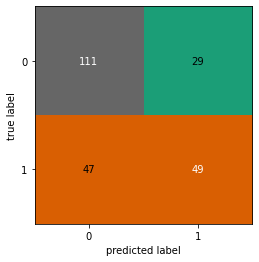

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       140
         1.0       0.63      0.51      0.56        96

    accuracy                           0.68       236
   macro avg       0.67      0.65      0.65       236
weighted avg       0.67      0.68      0.67       236



# decision tree

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [1. 0. 0. 0. 1. 0. 1. 0. 1. 1.]
dati reali presenti nel dataset di test = [1. 0. 0. 0. 1. 0. 1. 0. 1. 1.]


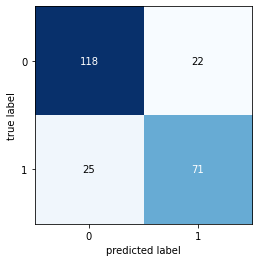

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       140
         1.0       0.76      0.74      0.75        96

    accuracy                           0.80       236
   macro avg       0.79      0.79      0.79       236
weighted avg       0.80      0.80      0.80       236



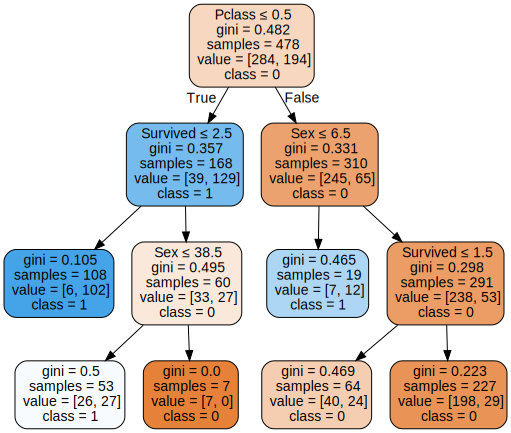

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph

# decision tree > knn 
perchè è più accurato non sopravissuti(74% contro 83%) e sopravissuti(56% contro 75%)